In [2]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

In [3]:
import requests

In [ ]:
from bs4 import BeautifulSoup

url = 'https://www.pro-football-reference.com'
year = 2024

r = requests.get(url + '/years/' + str(year) + '/fantasy.htm')
soup = BeautifulSoup(r.content, 'html.parser')
parsed_table = soup.find_all('table')[0]  

#### NFL verse

In [1]:
pip install nflreadpy

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   -------------------- ------------------- 1.0/2.0 MB 12.7 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 5.6 MB/s  0:00:00

   ------ --------------------------------- 1/6 [pydantic-core]
  Attempting uninstall: pydantic
   ------ --------------------------------- 1/6 [pydantic-core]
    Found existing installation: pydantic 1.10.18
   ------ --------------------------------- 1/6 [pydantic-core]
   -------------------- ------------------- 3/6 [pydantic]
    Uninstalling pydantic-1.10.18:
   -------------------- ------------------- 3/6 [pydantic]
      Successfully uninstalled pydantic-1.10.18
   -------------------- ------------------- 3/6 [pydantic]
   -------------------- ------------------- 3/6 [pydantic]
   -------------------- ------------------- 3/6 [pydantic]
   -------------------- ------------------- 3/6 [pydantic]
   -------------------- ------------------- 3/6 [pydantic]
   ------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.85.0 requires pydantic!=1.7,!=1.7.1,!=1.7.2,!=1.7.3,!=1.8,!=1.8.1,<2.0.0,>=1.6.2, but you have pydantic 2.12.5 which is incompatible.


In [25]:
import nflreadpy as nfl

# Load current season play-by-play data
pbp = nfl.load_pbp()

# Load player game-level stats for multiple seasons
player_stats = nfl.load_player_stats([i for i in range(2014, 2026)])
player_stats = player_stats.to_pandas()

# Load all available team level stats
team_stats = nfl.load_team_stats(seasons=True)

# nflreadpy uses Polars instead of pandas. Convert to pandas if needed:
pbp_pandas = pbp.to_pandas()

In [11]:
player_info = nfl.load_players()

In [20]:
sched = nfl.load_schedules()
sched = sched.to_pandas()


In [23]:
post_2014 = sched[sched['season'] >= 2014]

In [24]:
post_2014.columns


Index(['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday',
       'gametime', 'away_team', 'away_score', 'home_team', 'home_score',
       'location', 'result', 'total', 'overtime', 'old_game_id', 'gsis',
       'nfl_detail_id', 'pfr', 'pff', 'espn', 'ftn', 'away_rest', 'home_rest',
       'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds',
       'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game',
       'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id',
       'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee',
       'stadium_id', 'stadium'],
      dtype='object')

In [53]:
player_stats[player_stats['player_display_name'] == "Patrick Mahomes"]

,player_id,player_name,player_display_name,position,position_group,season,week,season_type,team,opponent_team,...,pat_made,pat_att,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance
69521,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2017,17,REG,KC,DEN,...,0,0,0,0,NaN,0,0,0,0,0
71164,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2018,1,REG,KC,LAC,...,0,0,0,0,NaN,0,0,0,0,0
72194,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2018,2,REG,KC,PIT,...,0,0,0,0,NaN,0,0,0,0,0
73240,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2018,3,REG,KC,SF,...,0,0,0,0,NaN,0,0,0,0,0
74216,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2018,4,REG,KC,DEN,...,0,0,0,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206482,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2025,9,REG,KC,BUF,...,0,0,0,0,NaN,0,0,0,0,0
208396,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2025,11,REG,KC,DEN,...,0,0,0,0,NaN,0,0,0,0,0
209419,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2025,12,REG,KC,IND,...,0,0,0,0,NaN,0,0,0,0,0
210405,00-0033873,P.Mahomes,Patrick Mahomes,QB,QB,2025,13,REG,KC,DAL,...,0,0,0,0,NaN,0,0,0,0,0


In [30]:
team_stats.to_pandas()

,season,week,team,season_type,opponent_team,completions,attempts,passing_yards,passing_tds,passing_interceptions,...,pat_made,pat_att,pat_missed,pat_blocked,pat_pct,gwfg_made,gwfg_att,gwfg_missed,gwfg_blocked,gwfg_distance
0,1999,1,ARI,REG,PHI,25,48,274,1,3,...,1,1,0,0,1.0,1,1,0,0,31
1,1999,1,ATL,REG,MIN,18,31,290,1,0,...,2,2,0,0,1.0,0,0,0,0,0
2,1999,1,BUF,REG,IND,22,42,300,1,2,...,0,0,0,0,NaN,0,0,0,0,0
3,1999,1,CAR,REG,NO,16,32,207,1,1,...,1,1,0,0,1.0,0,0,0,0,0
4,1999,1,CHI,REG,KC,31,47,322,2,0,...,2,2,0,0,1.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14372,2025,14,PIT,REG,BAL,23,34,284,1,0,...,3,3,0,0,1.0,0,0,0,0,0
14373,2025,14,SEA,REG,ATL,20,30,249,3,1,...,4,4,0,0,1.0,0,0,0,0,0
14374,2025,14,TB,REG,NO,14,30,122,1,1,...,2,2,0,0,1.0,0,0,0,0,0
14375,2025,14,TEN,REG,CLE,14,28,117,2,1,...,4,4,0,0,1.0,0,0,0,0,0


In [39]:
player_info.columns

['gsis_id',
 'display_name',
 'common_first_name',
 'first_name',
 'last_name',
 'short_name',
 'football_name',
 'suffix',
 'esb_id',
 'nfl_id',
 'pfr_id',
 'pff_id',
 'otc_id',
 'espn_id',
 'smart_id',
 'birth_date',
 'position_group',
 'position',
 'ngs_position_group',
 'ngs_position',
 'height',
 'weight',
 'headshot',
 'college_name',
 'college_conference',
 'jersey_number',
 'rookie_season',
 'last_season',
 'latest_team',
 'status',
 'ngs_status',
 'ngs_status_short_description',
 'years_of_experience',
 'pff_position',
 'pff_status',
 'draft_year',
 'draft_round',
 'draft_pick',
 'draft_team']

In [46]:
injuries = nfl.load_injuries([i for i in range(2014, 2025)])

In [63]:
injuries = injuries.to_pandas()
injuries.head()

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
0,2014.0,REG,ARI,1.0,00-0030503,LB,Alex Okafor,Alex,Okafor,Thigh,None,Out,Thigh,None,Did Not Participate In Practice,2014-09-06 13:47:47+00:00
1,2014.0,REG,ARI,1.0,00-0030459,S,Tyrann Mathieu,Tyrann,Mathieu,Knee,None,Questionable,Knee,None,Full Participation in Practice,2014-09-06 13:48:40+00:00
2,2014.0,REG,ARI,1.0,00-0030287,RB,Andre Ellington,Andre,Ellington,Foot,None,Questionable,Foot,None,Limited Participation in Practice,2014-09-06 13:48:09+00:00
3,2014.0,REG,ARI,1.0,00-0021235,P,Dave Zastudil,Dave,Zastudil,left Groin,None,Questionable,left Groin,None,Limited Participation in Practice,2014-09-06 13:48:02+00:00
4,2014.0,REG,ARI,1.0,00-0030590,G,Jonathan Cooper,Jonathan,Cooper,Toe,None,Probable,Toe,None,Full Participation in Practice,2014-09-06 13:47:38+00:00


In [56]:
injuries['practice_secondary_injury'].value_counts()

practice_secondary_injury,count
str,u32
"""Rest""",4
"""Neck, Back""",1
"""Ankle, Knee""",1
"""Elbow""",68
"""Resting Vet""",3
…,…
"""elbow, knee""",1
"""Personal""",1
"""Achilles""",29


In [78]:
injuries

,season,game_type,team,week,gsis_id,position,full_name,first_name,last_name,report_primary_injury,report_secondary_injury,report_status,practice_primary_injury,practice_secondary_injury,practice_status,date_modified
0,2014.0,REG,ARI,1.0,00-0030503,LB,Alex Okafor,Alex,Okafor,Thigh,None,Out,Thigh,None,Did Not Participate In Practice,2014-09-06 13:47:47+00:00
1,2014.0,REG,ARI,1.0,00-0030459,S,Tyrann Mathieu,Tyrann,Mathieu,Knee,None,Questionable,Knee,None,Full Participation in Practice,2014-09-06 13:48:40+00:00
2,2014.0,REG,ARI,1.0,00-0030287,RB,Andre Ellington,Andre,Ellington,Foot,None,Questionable,Foot,None,Limited Participation in Practice,2014-09-06 13:48:09+00:00
3,2014.0,REG,ARI,1.0,00-0021235,P,Dave Zastudil,Dave,Zastudil,left Groin,None,Questionable,left Groin,None,Limited Participation in Practice,2014-09-06 13:48:02+00:00
4,2014.0,REG,ARI,1.0,00-0030590,G,Jonathan Cooper,Jonathan,Cooper,Toe,None,Probable,Toe,None,Full Participation in Practice,2014-09-06 13:47:38+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59793,2024.0,SB,PHI,22.0,00-0036912,WR,DeVonta Smith,DeVonta,Smith,None,None,None,Hamstring,None,Limited Participation in Practice,2025-02-07 20:29:05+00:00
59794,2024.0,SB,PHI,22.0,00-0037132,WR,Britain Covey,Britain,Covey,Neck,None,Out,Neck,None,Full Participation in Practice,2025-02-07 20:32:07+00:00
59795,2024.0,SB,PHI,22.0,00-0027865,DE,Brandon Graham,Brandon,Graham,Elbow,None,Questionable,Elbow,None,Full Participation in Practice,2025-02-07 20:31:06+00:00
59796,2024.0,SB,PHI,22.0,00-0032134,TE,C.J. Uzomah,C.J.,Uzomah,Abdomen,None,Questionable,Abdomen,None,Full Participation in Practice,2025-02-07 20:31:06+00:00


In [101]:
pos_injuries = injuries.groupby('position').size()

In [103]:
pos_injuries


position
\n          12
C         1882
CB        7229
DE        4751
DT        4539
FB         135
G         3713
K          376
LB        8337
LS         181
P          230
QB        2028
RB        4726
S         4866
T         5051
TE        3883
WR        7859
dtype: int64

In [100]:
pos_injuries

,position,0
1,C,1882
2,CB,7229
3,DE,4751
4,DT,4539
5,FB,135
6,G,3713
7,K,376
8,LB,8337
9,LS,181
10,P,230


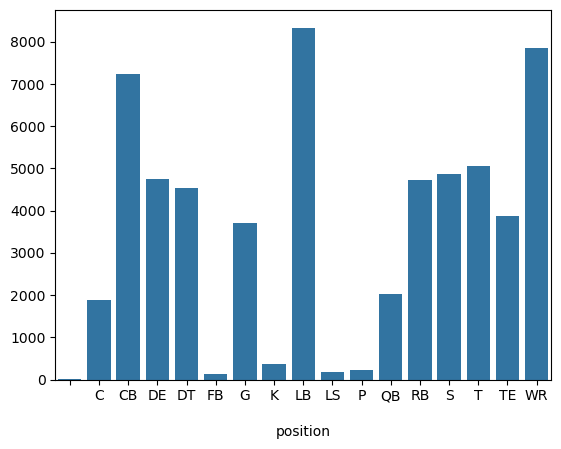

In [104]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.barplot(pos_injuries)
plt.show()

In [48]:
player_stats.drop(columns=['headshot_url', 'fantasy_points', 'fantasy_points_ppr'], inplace=True)

In [58]:
participation = nfl.load_participation([i for i in range(2016, 2025)])

In [59]:
participation.head()

nflverse_game_id,old_game_id,play_id,possession_team,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type,offense_names,defense_names,offense_positions,defense_positions,offense_numbers,defense_numbers
str,str,f64,str,str,str,i32,str,i32,str,str,str,i32,i32,f64,f64,bool,str,str,str,str,str,str,str,str,str
"""2016_01_CAR_DEN""","""2016090800""",1.0,"""""",null,null,null,null,null,"""""","""""","""""",0,0,null,null,null,null,null,null,null,null,null,null,null,null
"""2016_01_CAR_DEN""","""2016090800""",36.0,"""CAR""",null,null,null,null,null,"""41285;42728;39857;43366;35656;…","""00-0029731;00-0032891;00-00315…","""00-0031344;00-0031697;00-00278…",11,11,null,null,null,null,null,null,null,null,null,null,null,null
"""2016_01_CAR_DEN""","""2016090800""",51.0,"""DEN""","""SINGLEBACK""","""1 RB, 1 TE, 3 WR""",6,"""4 DL, 2 LB, 5 DB""",4,"""35521;42593;41377;35685;35461;…","""00-0027685;00-0032156;00-00278…","""00-0031262;00-0027835;00-00313…",11,11,-1.21,2.323,false,"""SCREEN""",null,null,null,null,null,null,null,null
"""2016_01_CAR_DEN""","""2016090800""",75.0,"""DEN""","""I_FORM""","""6 OL, 2 RB, 0 TE, 2 WR""",8,"""4 DL, 3 LB, 4 DB""",6,"""42368;41377;42593;35521;41285;…","""00-0032156;00-0027685;00-00313…","""00-0031550;00-0031262;00-00278…",10,11,-2.22,2.893,true,"""FLAT""",null,null,null,null,null,null,null,null
"""2016_01_CAR_DEN""","""2016090800""",97.0,"""DEN""","""SINGLEBACK""","""1 RB, 1 TE, 3 WR""",7,"""4 DL, 2 LB, 5 DB""",3,"""41285;42476;43351;38539;39992;…","""00-0031344;00-0032132;00-00295…","""00-0032890;00-0029248;00-00304…",11,11,4.91,2.556,false,"""OUT""",null,null,null,null,null,null,null,null


In [107]:
rosters = nfl.load_rosters_weekly([i for i in range(2014, 2026)]).to_pandas()

In [108]:
rosters

,season,team,position,depth_chart_position,jersey_number,status,full_name,first_name,last_name,birth_date,...,game_type,status_description_abbr,football_name,esb_id,gsis_it_id,smart_id,entry_year,rookie_year,draft_club,draft_number
0,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
1,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
2,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
3,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
4,2014,SF,K,None,9,ACT,Phil Dawson,Philip,Dawson,1975-01-23,...,REG,A01,Phil,DAW705989,23860,32004441-5770-5989-ac23-bf6cdafcb988,1998.0,1998.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517560,2025,HOU,TE,TE,None,DEV,Layne Pryor,Layne,Pryor,NaT,...,REG,P02,Layne,PRY456541,59332,None,2025.0,2025.0,None,None
517561,2025,HOU,TE,TE,49,DEV,Layne Pryor,Layne,Pryor,NaT,...,REG,P02,Layne,PRY456541,59332,None,2025.0,2025.0,None,None
517562,2025,HOU,TE,TE,None,DEV,Layne Pryor,Layne,Pryor,NaT,...,REG,P02,Layne,PRY456541,59332,None,2025.0,2025.0,None,None
517563,2025,NYJ,DL,DE,54,DEV,Paschal Ekeji,Paschal,Ekeji,NaT,...,REG,P03,Paschal,EKE080143,59345,None,2025.0,2025.0,None,None


In [110]:
snap_counts = nfl.load_snap_counts([i for i in range(2014, 2026)]).to_pandas()

In [111]:
snap_counts

,game_id,pfr_game_id,season,game_type,week,player,pfr_player_id,position,team,opponent,offense_snaps,offense_pct,defense_snaps,defense_pct,st_snaps,st_pct
0,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jordan Mills,MillJo02,T,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
1,2014_01_BUF_CHI,201409070chi,2014,REG,1,Kyle Long,LongKy00,G,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
2,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jermon Bushrod,BushJe20,T,CHI,BUF,74.0,1.00,0.0,0.0,4.0,0.14
3,2014_01_BUF_CHI,201409070chi,2014,REG,1,Jay Cutler,CutlJa00,QB,CHI,BUF,74.0,1.00,0.0,0.0,0.0,0.00
4,2014_01_BUF_CHI,201409070chi,2014,REG,1,Martellus Bennett,BennMa00,TE,CHI,BUF,70.0,0.95,0.0,0.0,4.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293630,2025_14_WAS_MIN,202512070min,2025,REG,14,Kain Medrano,MedrKa00,LB,WAS,MIN,0.0,0.00,0.0,0.0,11.0,0.69
293631,2025_14_WAS_MIN,202512070min,2025,REG,14,Percy Butler,ButlPe00,S,WAS,MIN,0.0,0.00,0.0,0.0,11.0,0.69
293632,2025_14_WAS_MIN,202512070min,2025,REG,14,Tyler Ott,OttxTy00,LS,WAS,MIN,0.0,0.00,0.0,0.0,3.0,0.19
293633,2025_14_WAS_MIN,202512070min,2025,REG,14,Tress Way,WayxTr00,P,WAS,MIN,0.0,0.00,0.0,0.0,3.0,0.19


### merging:
 How do bye-week timing and rest differentials affect injury / re-injury risk?  

Thoughts:
- Player-game level granularity 
- merge schedule and snap counts in like game id??
- merge weekly roster to snap counts? or smth on player id, week, season?
- merge injuries on player id, week, season?
basically get things like which player was injured / how much they played each week for each season
- can maybe calculate per player or something differences in playing days (rest time)??